In [1]:
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '1'
import tensorflow as tf
print(tf.__version__)
print(tf.test.is_built_with_cuda())
print(tf.config.list_physical_devices('GPU'))

2.9.1
True
[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


# Linear Models

## Input data

### How to import and convert data

In [2]:
# Import numpy and pandas
import numpy as np
import pandas as pd
# Load data from csv
housing = pd.read_csv('kc_house_data.csv')
housing

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,...,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,...,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,...,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,20150116T000000,400000.0,3,2.50,1600,2388,2.0,0,0,...,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


### Setting the data type

In [3]:
# Convert price column to float32
price = np.array(housing['price'], np.float32)
price.shape, price

((21613,),
 array([221900., 538000., 180000., ..., 402101., 400000., 325000.],
       dtype=float32))

In [4]:
# Convert price column to float32 tensor
price = tf.cast(housing['price'], tf.float32)
price

<tf.Tensor: shape=(21613,), dtype=float32, numpy=
array([221900., 538000., 180000., ..., 402101., 400000., 325000.],
      dtype=float32)>

In [5]:
# Convert waterfront column to Boolean
waterfront = np.array(housing['waterfront'], 'bool')
waterfront.shape, waterfront

((21613,), array([False, False, False, ..., False, False, False]))

In [6]:
# Convert waterfront column to Boolean tensor
waterfront = tf.cast(housing['waterfront'], tf.bool)
waterfront

<tf.Tensor: shape=(21613,), dtype=bool, numpy=array([False, False, False, ..., False, False, False])>

## Loss functions

### Why do we care about loss functions?
* MSE
    * Strongly penalizes outliers
    * High (gradient) sensitivity near minimum
* MAE
    * Scales linearly with size of error
    * Low sensitivity near minimum
* Huber
    * Similar to MSE near minimum
    * Similar to MAE away from minimum

> For greater sensitivity near the minimum, you will want to use the MSE or Huber loss.  
> To minimize the impact of outliers, you will want to use the MAE or Huber loss. 

### Defining a loss function

In [7]:
# Define a linear regression model
def linear_regression(intercept, slope, features):
    return intercept + features * slope

# Define a loss function to compute the MSE
def loss_function(intercept, slope, targets, features):
    # Compute the predictions for a linear model
    predictions = linear_regression(intercept, slope)
    # Return the loss
    return tf.keras.losses.mse(targets, predictions)

## Linear regression

### What is a linear regression?

> Note that we've actually plotted the relationship after taking the natural logarithm of each variable, which is useful when we suspect that the relationship is proportional.  That is, we might expect an x percent increase in size to be associated with a y percent increase in price.

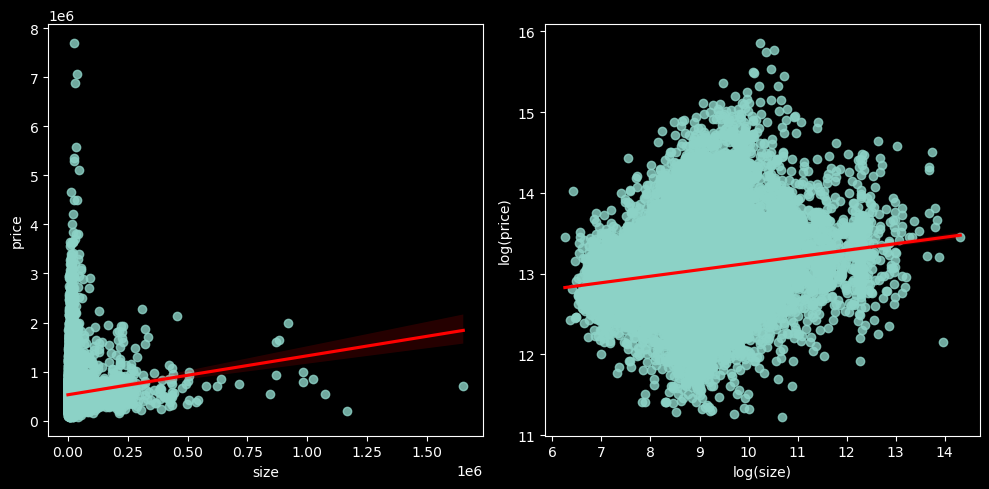

In [8]:
import matplotlib.pyplot as plt
plt.style.use('dark_background')
import seaborn as sns
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
sns.regplot(data=None, x=housing['sqft_lot'], y=housing['price'], line_kws={"color": "red"})
plt.xlabel('size'); plt.ylabel('price')
plt.subplot(1,2,2)
sns.regplot(data=None, x=np.log(housing['sqft_lot']), y=np.log(housing['price']), line_kws={"color": "red"})
plt.xlabel('log(size)'); plt.ylabel('log(price)')
plt.tight_layout()
plt.show()

> In our case, we've assumed that the relationship is linear after taking natural logarithms. 

* A linear regression model assumes a linear relationship:
    * $ price = intercept + size \times slope + error$
* This is an example of a univariate regression.
    * There is only one feature, size .
* Multiple regression models have more than one feature.
    * E.g. size and location

### Linear regression in TensorFlow

In [9]:
# Define the targets and features
size_log = np.log(np.array(housing['sqft_lot'], np.float32))
price_log = np.log(np.array(housing['price'], np.float32))

In [10]:
# Initialize the intercept and slope variables
intercept = tf.Variable(5.0, np.float32)
slope = tf.Variable(0.001, np.float32)
intercept, slope

(<tf.Variable 'Variable:0' shape=() dtype=float32, numpy=5.0>,
 <tf.Variable 'Variable:0' shape=() dtype=float32, numpy=0.001>)

In [11]:
# Define a linear regression model
def linear_regression(intercept, slope, features = size_log):
	return intercept + slope * features

# Set loss_function() to take the variables as arguments
def loss_function(intercept, slope, features, targets):
	# Set the predicted values
	predictions = linear_regression(intercept=intercept, slope=slope, features=features)
    
    # Return the mean squared error loss
	return tf.keras.losses.mse(y_true=targets, y_pred=predictions)

# Compute the loss for different slope and intercept values
print(loss_function(intercept=0.1, slope=0.1, features=size_log, targets=price_log).numpy())
print(loss_function(intercept=0.1, slope=0.5, features=size_log, targets=price_log).numpy())

145.44653
71.866


In [12]:
def plot_results(intercept, slope):
	# size_range = np.linspace(6,14,100)
	# price_pred = [intercept+slope*s for s in size_range]
	price_pred = [intercept + slope * size for size in size_log]
	plt.scatter(size_log, price_log, color = 'gray')
	# plt.plot(size_range, price_pred, linewidth=3.0, color='red')
	plt.plot(size_log, price_pred, linewidth=3.0, color='red')
	plt.xlabel('log(size)')
	plt.ylabel('log(price)')
	plt.title('Scatterplot of data and fitted regression line')
	plt.show()

In [13]:
# Initialize an Adam optimizer with 0.5 learning rate
opt = tf.keras.optimizers.Adam(0.5)

In [14]:
for j in range(1, 101):
	# Apply minimize, pass the loss function, and supply the variables
	opt.minimize(lambda: loss_function(intercept=intercept, slope=slope, features=size_log, targets=price_log), var_list=[intercept, slope])
 	# Print every 10th value of the loss
	if j % 10 == 0:
		print(f'{j=} intercept={intercept.numpy()}, slope={slope.numpy()}, loss={loss_function(intercept, slope, features=size_log, targets=price_log).numpy()}')

j=10 intercept=5.5283522605896, slope=0.4754737913608551, loss=10.929107666015625
j=20 intercept=6.075632095336914, slope=0.9313344359397888, loss=2.823115825653076
j=30 intercept=6.093385696411133, slope=0.8380051851272583, loss=1.0750147104263306
j=40 intercept=6.078200817108154, slope=0.6951261162757874, loss=1.0989338159561157
j=50 intercept=6.240671634674072, slope=0.7161364555358887, loss=0.7375045418739319
j=60 intercept=6.419623374938965, slope=0.7418065071105957, loss=0.6300281286239624
j=70 intercept=6.57301664352417, slope=0.7319847345352173, loss=0.6290514469146729
j=80 intercept=6.721395492553711, slope=0.7089128494262695, loss=0.5960037708282471
j=90 intercept=6.876579284667969, slope=0.685921311378479, loss=0.5707435011863708
j=100 intercept=7.039300918579102, slope=0.6650958061218262, loss=0.5513952374458313


In [15]:
intercept, slope

(<tf.Variable 'Variable:0' shape=() dtype=float32, numpy=7.039301>,
 <tf.Variable 'Variable:0' shape=() dtype=float32, numpy=0.6650958>)

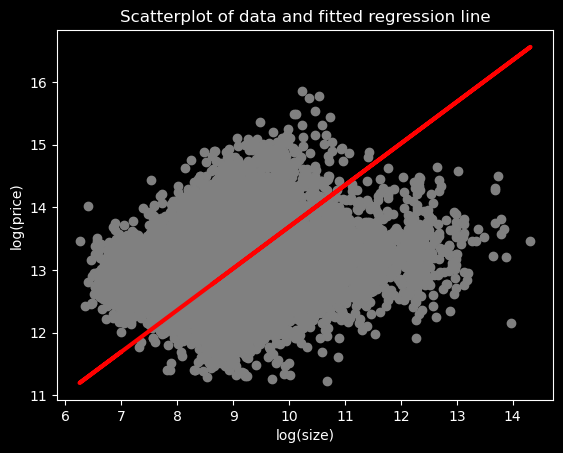

In [16]:
# Plot data and regression line
plot_results(intercept, slope)

### Multiple linear regression

In [86]:
size_log = np.log(np.array(housing['sqft_lot'], np.float32))
price_log = np.log(np.array(housing['price'], np.float32))
bedrooms = np.array(housing.bedrooms, np.float32)

Here, params[0] is the intercept and params[1] and params[2] are the slopes.

In [87]:
params = tf.Variable([0.1 , 0.05, 0.02], np.float32)
params

<tf.Variable 'Variable:0' shape=(3,) dtype=float32, numpy=array([0.1 , 0.05, 0.02], dtype=float32)>

In [88]:
# Define the linear regression model
def linear_regression(params, feature1, feature2):
	return params[0] + feature1*params[1] + feature2*params[2]

In [89]:
# Define the loss function
def loss_function(params, targets, feature1, feature2):
	# Set the predicted values
	predictions = linear_regression(params=params, feature1=feature1, feature2=feature2)
  
	# Use the mean absolute error loss
	return tf.keras.losses.mae(y_true=targets, y_pred=predictions)

In [90]:
# Define the optimize operation
opt = tf.keras.optimizers.Adam()

In [91]:
# Perform minimization and print trainable variables
for j in range(1, 1001):
    opt.minimize(lambda: loss_function(params=params, targets=price_log, feature1=size_log, feature2=bedrooms), var_list=[params])
    loss = loss_function(params=params, targets=price_log, feature1=size_log, feature2=bedrooms)
    if j % 100 == 0:
        print('loss: {:0.3f}, intercept: {:0.3f}, slope_1: {:0.3f}, slope_2: {:0.3f}'.format(loss.numpy(), params[0].numpy(), params[1].numpy(), params[2].numpy()))    

loss: 11.095, intercept: 0.200, slope_1: 0.150, slope_2: 0.120
loss: 9.759, intercept: 0.300, slope_1: 0.250, slope_2: 0.220
loss: 8.423, intercept: 0.400, slope_1: 0.350, slope_2: 0.320
loss: 7.087, intercept: 0.500, slope_1: 0.450, slope_2: 0.420
loss: 5.752, intercept: 0.600, slope_1: 0.550, slope_2: 0.520
loss: 4.416, intercept: 0.700, slope_1: 0.650, slope_2: 0.620
loss: 3.087, intercept: 0.800, slope_1: 0.750, slope_2: 0.720
loss: 1.865, intercept: 0.897, slope_1: 0.846, slope_2: 0.815
loss: 1.139, intercept: 0.976, slope_1: 0.922, slope_2: 0.888
loss: 0.982, intercept: 1.018, slope_1: 0.959, slope_2: 0.918


> Note that params[2] tells us how much the price will increase in percentage terms if we add one more bedroom. You could train params[2] and the other model parameters by increasing the number of times we iterate over opt.

In [93]:
params

<tf.Variable 'Variable:0' shape=(3,) dtype=float32, numpy=array([1.0180898, 0.9594548, 0.9179167], dtype=float32)>

## Batch training

### What is batch training?

In [96]:
housing = pd.read_csv('kc_house_data.csv')
housing[['price', 'sqft_lot', 'bedrooms']]

,price,sqft_lot,bedrooms
0,221900.0,5650,3
1,538000.0,7242,3
2,180000.0,10000,2
3,604000.0,5000,4
4,510000.0,8080,3
...,...,...,...
21608,360000.0,1131,3
21609,400000.0,5813,4
21610,402101.0,1350,2
21611,400000.0,2388,3


* This time, let's say the dataset is much larger and you want to perform the training on a GPU, which has only small amount of memory.
* Since you can't fit the entire dataset in memory, you will instead divide it into batches and train on those batches sequentially.
* A single pass over all of the batches is called an epoch and the process itself is called batch training.
* It will be quite useful when you work with large image datasets.
* Beyond alleviating memory constraints, batch training will also allow you to update model weights and optimizer parameters after each batch, rather than at the end of the epoch. 

### The chunksize parameter
* `pd.read_csv()` allows us to load data in batches
    * Avoid loading entire dataset
    * `chunksize` parameter provides batch size

In [101]:
# Load data in batches
for batch in pd.read_csv('kc_house_data.csv', chunksize=100):
    # Extract price column
    price = np.array(batch['price'], np.float32)
    # Extract size column
    size = np.array(batch['sqft_lot'], np.float32)

### Training a linear model in batches

In [109]:
# Define trainable variables
intercept = tf.Variable(0.1, tf.float32)
slope = tf.Variable(0.1, tf.float32)
print(f'intercept {intercept.numpy()} slope {slope.numpy()}')

# Define the model
def linear_regression(intercept, slope, features):
    return intercept + features * slope

# Compute predicted values and return loss function
def loss_function(intercept, slope, targets, features):
    predictions = linear_regression(intercept, slope, features)
    return tf.keras.losses.mse(targets, predictions)

# Define optimization operation
opt = tf.keras.optimizers.Adam()

# Load the data in batches from pandas
for batch in pd.read_csv('kc_house_data.csv', chunksize=100):
    # Extract the target and feature columns
    price_batch = np.array(batch['price'], np.float32)
    size_batch = np.array(batch['sqft_lot'], np.float32)
    # Minimize the loss function
    opt.minimize(lambda: loss_function(intercept, slope, price_batch, size_batch),
                 var_list=[intercept, slope])
# Print parameter values
print(f'intercept {intercept.numpy()} slope {slope.numpy()}')

intercept 0.10000000149011612 slope 0.10000000149011612
intercept 0.3178192377090454 slope 0.2983102798461914


### Full sample versus batch training
* Full Sample
    1. One update per epoch
    2. Accepts dataset without modification
    3. Limited by memory
* Batch Training
    1. Multiple updates per epoch
    2. Requires division of dataset
    3. No limit on dataset size

### Preparing to batch train

In [116]:
# Define the intercept and slope
intercept = tf.Variable(10.0, np.float32)
slope = tf.Variable(0.5, np.float32)

# Define the model
def linear_regression(intercept, slope, features):
	# Define the predicted values
	return intercept + slope * features

# Define the loss function
def loss_function(intercept, slope, targets, features):
	# Define the predicted values
	predictions = linear_regression(intercept, slope, features)
    
 	# Define the MSE loss
	return tf.keras.losses.mse(targets, predictions)

### Training a linear model in batches

In [117]:
# Initialize Adam optimizer
opt = tf.keras.optimizers.Adam()

# Load data in batches
for batch in pd.read_csv('kc_house_data.csv', chunksize=100):
	size_batch = np.array(batch['sqft_lot'], np.float32)

	# Extract the price values for the current batch
	price_batch = np.array(batch['price'], np.float32)

	# Complete the loss, fill in the variable list, and minimize
	opt.minimize(lambda: loss_function(intercept, slope, price_batch, size_batch),
                 var_list=[intercept, slope])

# Print trained parameters
print(intercept.numpy(), slope.numpy())

10.217888 0.7016001
